In [1]:
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.models import Model
from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np

In [3]:
base_model = ResNet50(weights='imagenet',
                      include_top=False,
                      input_shape = (512, 512, 3))

Instructions for updating:
Colocations handled automatically by placer.


/Users/peterweber/Programs/anaconda2/envs/tensorflow/lib/python3.7/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [4]:
base_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 512, 512, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 518, 518, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 256, 256, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 256, 256, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [83]:
model = Model(inputs=base_model.input, 
              outputs=base_model.get_layer('activation_1').output)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 64)    9472      
_________________________________________________________________
bn_conv1 (BatchNormalization (None, None, None, 64)    256       
_________________________________________________________________
activation_1 (Activation)    (None, None, None, 64)    0         
Total params: 9,728
Trainable params: 9,600
Non-trainable params: 128
_________________________________________________________________


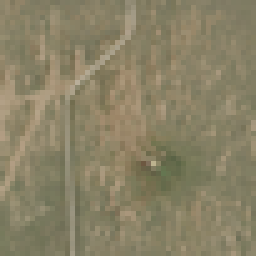

In [11]:
path = "/Users/peterweber/Google Drive/MFP - Satellogic/images/usgs_1m_512/m_3010358_ne_13_1_20161005_x736_y3617_size512_res10m.png"
test_image = image.load_img(path, target_size = (256, 256))
test_image
#image.img_to_array(test_image).shape

In [99]:
x = image.img_to_array(test_image)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print("Shape of input to network:", x.shape)

activation = model.predict(x)
activation.shape

Shape of input to network: (1, 512, 512, 3)


(1, 256, 256, 64)

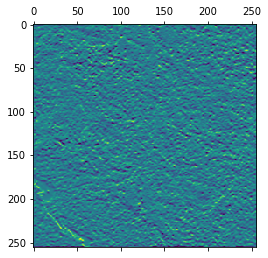

In [85]:
filter_no = 4
plt.matshow(activation[0, :, :, filter_no], cmap='viridis')